In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint

#pd.set_option('display.max_rows', None)  # None means show all rows
#pd.set_option('display.max_columns', None)  # None means show all columns
#pd.set_option('display.width', 1000)  # Set the width of the display for wrapping
#pd.set_option('display.max_colwidth', None)  # Display full content of each column



# py -m pip install matplotlib


In [2]:
df_private = pd.read_csv('df_private_dummies.txt', sep="\t")

In [3]:
X = df_private.drop(columns=['Churn']) 
y = df_private['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.8, random_state=42)

In [4]:
pd.set_option('display.max_rows', None)  # None means show all rows
pd.set_option('display.max_columns', None)  # None means show all columns
pd.set_option('display.width', 1000)  # Set the width of the display for wrapping
pd.set_option('display.max_colwidth', None)  # Display full content of each column

missing_values_count = df_private.isna().sum()

print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
Vehicle_age                                     0
GWP                                             0
number_of_claims                                0
Churn                                           0
Renewal                                         0
Policy_Duration                                 0
Client_Age                                      0
Years_of_driving                                0
PRODUCT_MOD                                     0
PRODUCT_MTPL                                    0
Duration_Long                                   0
Duration_Short                                  0
Make_ALFA ROMEO                                 0
Make_APRILIA                                    0
Make_AUDI                                       0
Make_BMW                                        0
Make_CHEVROLET                                  0
Make_CHRYSLER                                   0
Make_CITROEN                                    0
Make_DAIM

In [5]:
param_dist_org = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search_org = RandomizedSearchCV(knn, param_distributions=param_dist_org, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search_org.fit(X_train, y_train)

y_pred_org = random_search_org.predict(X_test)
print("Best KNN Parameters:", random_search_org.best_params_)
print("Test F1 Score for KNN:", f1_score(y_test, y_pred_org))

# Best KNN Parameters: {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
# Test F1 Score for KNN: 0.6515962720602816

Best KNN Parameters: {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
Test F1 Score for KNN: 0.6515962720602816


In [6]:


important_features = [
    'GWP', 'PRODUCT_MOD', 'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short',
       'Make_ALFA ROMEO', 'Make_APRILIA', 'Make_CHEVROLET',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_JAGUAR',
       'Make_JEEP', 'Make_KAWASAKI', 'Make_KIA', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_MINI', 'Make_NISSAN', 'Make_Other',
       'Make_ROVER', 'Make_SAAB', 'Make_SUZUKI', 'Make_YAMAHA',
       'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Jonava', 'City_Kauno rajonas', 'City_Marijampolės rajonas',
       'City_Panevėžio rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinity',
       'Channel_Direct Corporate Sales',
       'Churn'

]

important_features = [feature for feature in important_features if feature in df_private.columns]

df_filtered = df_private[important_features]

#df_filtered['Policy_Type'] = (df_filtered['Duration_Long'] == 1).astype(int)

#df_filtered.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

#df_filtered.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)

#mode_value = df_filtered['Renewal'].mode()[0]  

#df_filtered['Renewal'].fillna(mode_value, inplace=True)

In [7]:
X_filtered = df_filtered.drop(columns=['Churn']) 
y_filtered = df_filtered['Churn']

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, stratify=y_filtered, test_size=0.3, random_state=42)

In [8]:
param_dist_org_filtered = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search_org_filtered = RandomizedSearchCV(knn, param_distributions=param_dist_org_filtered, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search_org_filtered.fit(X_train_filtered, y_train_filtered)

y_pred_org_filtered = random_search_org_filtered.predict(X_test_filtered)
print("Best KNN Parameters:", random_search_org_filtered.best_params_)
print("Test F1 Score for KNN:", f1_score(y_test_filtered, y_pred_org_filtered))


# Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
# Test F1 Score for KNN: 0.8904263877715205

Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Test F1 Score for KNN: 0.8904263877715205


In [9]:
f1_scorer = make_scorer(f1_score, greater_is_better = True)

In [10]:
df_sm = pd.read_csv('train_data_sm.txt', sep='\t')


mode_value = df_sm['Renewal'].mode()[0]  
df_sm['Renewal'].fillna(mode_value, inplace=True)

X_train_sm = df_sm.drop('Churn', axis=1)  
y_train_sm = df_sm['Churn'] 

X_train_sm_ht, X_test_sm_ht, y_train_sm_ht, y_test_sm_ht = train_test_split(X_train_sm, y_train_sm, stratify=y_train_sm, test_size=0.98, random_state=42)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_21116\2385251155.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sm['Renewal'].fillna(mode_value, inplace=True)


In [11]:
param_dist_sm = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search_sm = RandomizedSearchCV(knn, param_distributions=param_dist_sm, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = random_search_sm.predict(X_test)
print("Best KNN Parameters:", random_search_sm.best_params_)
print("Test F1 Score for KNN:", f1_score(y_test, y_pred_sm))

# Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
# Test F1 Score for KNN: 0.4612380842999885

Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Test F1 Score for KNN: 0.46037389608900103


In [12]:
important_features = [
    'GWP', 'number_of_claims', 'Policy_Duration', 'PRODUCT_MOD',
       'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short', 'Make_ALFA ROMEO',
       'Make_APRILIA', 'Make_CHEVROLET', 'Make_CHRYSLER',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_HYUNDAI',
       'Make_JAGUAR', 'Make_JEEP', 'Make_KAWASAKI', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_MINI', 'Make_NISSAN', 'Make_ROVER',
       'Make_SAAB', 'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Alytus', 'City_Jonava', 'City_Marijampolė',
       'City_Marijampolės rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinity',
       'Channel_Direct Corporate Sales',
       'Churn'

]

important_features = [feature for feature in important_features if feature in df_sm.columns]

df_filtered_sm = df_sm[important_features]

#df_filtered_sm['Policy_Type'] = (df_filtered_sm['Duration_Long'] == 1).astype(int)

#df_filtered_sm.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

#df_filtered_sm.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)

#mode_value = df_filtered_sm['Renewal'].mode()[0]  
#df_filtered_sm['Renewal'].fillna(mode_value, inplace=True)

X_train_sm_filtered = df_filtered_sm.drop(columns=['Churn']) 
y_train_sm_filtered = df_filtered_sm['Churn']


In [13]:


important_features = [
    'GWP', 'number_of_claims', 'Policy_Duration', 'PRODUCT_MOD',
       'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short', 'Make_ALFA ROMEO',
       'Make_APRILIA', 'Make_CHEVROLET', 'Make_CHRYSLER',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_HYUNDAI',
       'Make_JAGUAR', 'Make_JEEP', 'Make_KAWASAKI', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_MINI', 'Make_NISSAN', 'Make_ROVER',
       'Make_SAAB', 'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Alytus', 'City_Jonava', 'City_Marijampolė',
       'City_Marijampolės rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinity',
       'Channel_Direct Corporate Sales',
       'Churn'

]

important_features = [feature for feature in important_features if feature in df_private.columns]

df_filtered = df_private[important_features]

X_filtered = df_filtered.drop(columns=['Churn']) 
y_filtered = df_filtered['Churn']

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, stratify=y_filtered, test_size=0.3, random_state=42)

In [14]:
param_dist_sm_filtered = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search_sm_filtered = RandomizedSearchCV(knn, param_distributions=param_dist_sm_filtered, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search_sm_filtered.fit(X_train_sm_filtered, y_train_sm_filtered)

y_pred_sm_filtered = random_search_sm_filtered.predict(X_test_filtered)
print("Best KNN Parameters:", random_search_sm_filtered.best_params_)
print("Test F1 Score for KNN:", f1_score(y_test_filtered, y_pred_sm_filtered))

# Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
# Test F1 Score for KNN: 0.8463810930576071

Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Test F1 Score for KNN: 0.8470242468772962


In [15]:
df_smt = pd.read_csv('train_data_smt.txt', sep='\t')


mode_value = df_smt['Renewal'].mode()[0]  
df_smt['Renewal'].fillna(mode_value, inplace=True)

X_train_smt = df_smt.drop('Churn', axis=1)  
y_train_smt = df_smt['Churn']              

X_train_smt_ht, X_test_smt_ht, y_train_smt_ht, y_test_smt_ht = train_test_split(X_train_smt, y_train_smt, stratify=y_train_smt, test_size=0.99, random_state=42)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_21116\1952951087.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_smt['Renewal'].fillna(mode_value, inplace=True)


In [16]:
param_dist_smt = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search_smt = RandomizedSearchCV(knn, param_distributions=param_dist_smt, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search_smt.fit(X_train_smt, y_train_smt)

y_pred_smt = random_search_smt.predict(X_test)
print("Best KNN Parameters:", random_search_smt.best_params_)
print("Test F1 Score for KNN:", f1_score(y_test, y_pred_smt))

# Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
# Test F1 Score for KNN: 0.611050394656952

Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Test F1 Score for KNN: 0.45080091533180777


In [17]:
important_features = [
    'GWP', 'number_of_claims', 'Policy_Duration', 'PRODUCT_MOD',
       'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short', 'Make_ALFA ROMEO',
       'Make_APRILIA', 'Make_CHEVROLET', 'Make_CHRYSLER',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_HYUNDAI',
       'Make_JAGUAR', 'Make_JEEP', 'Make_KAWASAKI', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_MINI', 'Make_NISSAN', 'Make_ROVER',
       'Make_SAAB', 'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Alytus', 'City_Jonava', 'City_Marijampolė',
       'City_Marijampolės rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinity',
       'Channel_Direct Corporate Sales',
       'Churn'

]

important_features = [feature for feature in important_features if feature in df_smt.columns]

df_filtered_smt = df_smt[important_features]

#df_filtered_smt['Policy_Type'] = (df_filtered_smt['Duration_Long'] == 1).astype(int)

#df_filtered_smt.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

#df_filtered_smt.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)

#mode_value = df_filtered_smt['Renewal'].mode()[0]  
#df_filtered_smt['Renewal'].fillna(mode_value, inplace=True)

X_train_smt_filtered = df_filtered_smt.drop(columns=['Churn']) 
y_train_smt_filtered = df_filtered_smt['Churn']


In [18]:


important_features = [
    'GWP', 'number_of_claims', 'Policy_Duration', 'PRODUCT_MOD',
       'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short', 'Make_ALFA ROMEO',
       'Make_APRILIA', 'Make_CHEVROLET', 'Make_CHRYSLER',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_HYUNDAI',
       'Make_JAGUAR', 'Make_JEEP', 'Make_KAWASAKI', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_MINI', 'Make_NISSAN', 'Make_ROVER',
       'Make_SAAB', 'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Alytus', 'City_Jonava', 'City_Marijampolė',
       'City_Marijampolės rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinity',
       'Channel_Direct Corporate Sales',
       'Churn'
]

important_features = [feature for feature in important_features if feature in df_private.columns]

df_filtered = df_private[important_features]

X_filtered = df_filtered.drop(columns=['Churn']) 
y_filtered = df_filtered['Churn']

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, stratify=y_filtered, test_size=0.3, random_state=42)

In [19]:
param_dist_smt_filtered = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search_smt_filtered = RandomizedSearchCV(knn, param_distributions=param_dist_smt_filtered, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search_smt_filtered.fit(X_train_smt_filtered, y_train_smt_filtered)

y_pred_smt_filtered = random_search_smt_filtered.predict(X_test_filtered)
print("Best KNN Parameters:", random_search_smt_filtered.best_params_)
print("Test F1 Score for KNN:", f1_score(y_test_filtered, y_pred_smt_filtered))

# Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
# Test F1 Score for KNN: 0.20323173935890698

Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Test F1 Score for KNN: 0.8435414503930001


In [20]:
df_enn = pd.read_csv('train_data_enn.txt', sep='\t')


mode_value = df_enn['Renewal'].mode()[0]  
df_enn['Renewal'].fillna(mode_value, inplace=True)

X_train_enn = df_enn.drop('Churn', axis=1)  
y_train_enn = df_enn['Churn']              

X_train_enn_ht, X_test_enn_ht, y_train_enn_ht, y_test_enn_ht = train_test_split(X_train_enn, y_train_enn, stratify=y_train_enn, test_size=0.6, random_state=42)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_21116\4079823313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_enn['Renewal'].fillna(mode_value, inplace=True)


In [21]:
param_dist_enn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search_enn = RandomizedSearchCV(knn, param_distributions=param_dist_enn, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search_enn.fit(X_train_enn, y_train_enn)

y_pred_enn = random_search_enn.predict(X_test)
print("Best KNN Parameters:", random_search_enn.best_params_)
print("Test F1 Score for KNN:", f1_score(y_test, y_pred_enn))

# Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
# Test F1 Score for KNN: 0.39452526799387444


Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Test F1 Score for KNN: 0.39452526799387444


In [22]:
important_features = [
    'GWP', 'PRODUCT_MOD', 'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short',
       'Make_ALFA ROMEO', 'Make_APRILIA', 'Make_CHEVROLET',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_JAGUAR',
       'Make_JEEP', 'Make_KAWASAKI', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_LEXUS', 'Make_MAZDA', 'Make_MINI',
       'Make_MITSUBISHI', 'Make_Other', 'Make_ROVER', 'Make_SAAB',
       'Make_YAMAHA', 'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Kauno rajonas',
       'City_Marijampolė', 'City_Marijampolės rajonas', 'City_Mažeikiai',
       'City_Panevėžio rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinity',
       'Channel_Direct Corporate Sales',
       'Churn'

]

important_features = [feature for feature in important_features if feature in df_enn.columns]

df_filtered_enn = df_enn[important_features]

#df_filtered_enn['Policy_Type'] = (df_filtered_enn['Duration_Long'] == 1).astype(int)

#df_filtered_enn.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

#df_filtered_enn.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)

#mode_value = df_filtered_enn['Renewal'].mode()[0]  
#df_filtered_enn['Renewal'].fillna(mode_value, inplace=True)

X_train_enn_filtered = df_filtered_enn.drop(columns=['Churn']) 
y_train_enn_filtered = df_filtered_enn['Churn']


In [23]:


important_features = [
    'GWP', 'PRODUCT_MOD', 'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short',
       'Make_ALFA ROMEO', 'Make_APRILIA', 'Make_CHEVROLET',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_JAGUAR',
       'Make_JEEP', 'Make_KAWASAKI', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_LEXUS', 'Make_MAZDA', 'Make_MINI',
       'Make_MITSUBISHI', 'Make_Other', 'Make_ROVER', 'Make_SAAB',
       'Make_YAMAHA', 'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Kauno rajonas',
       'City_Marijampolė', 'City_Marijampolės rajonas', 'City_Mažeikiai',
       'City_Panevėžio rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinity',
       'Channel_Direct Corporate Sales',
       'Churn'
]

important_features = [feature for feature in important_features if feature in df_private.columns]

df_filtered = df_private[important_features]

X_filtered = df_filtered.drop(columns=['Churn']) 
y_filtered = df_filtered['Churn']

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, stratify=y_filtered, test_size=0.3, random_state=42)

In [24]:
param_dist_enn_filtered = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search_enn_filtered = RandomizedSearchCV(knn, param_distributions=param_dist_enn_filtered, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search_enn_filtered.fit(X_train_enn_filtered, y_train_enn_filtered)

y_pred_enn_filtered = random_search_enn_filtered.predict(X_test_filtered)
print("Best KNN Parameters:", random_search_enn_filtered.best_params_)
print("Test F1 Score for KNN:", f1_score(y_test_filtered, y_pred_enn_filtered))


# Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
# Test F1 Score for KNN: 0.8813451776649747

Best KNN Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Test F1 Score for KNN: 0.8813451776649747


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

###

accuracy = accuracy_score(y_test, y_pred_org)
precision = precision_score(y_test, y_pred_org)
recall = recall_score(y_test, y_pred_org)
f1 = f1_score(y_test, y_pred_org)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}\n')

# accuracy_filtered = accuracy_score(y_test_filtered, y_pred_org_filtered)
# precision_filtered = precision_score(y_test_filtered, y_pred_org_filtered)
# recall_filtered = recall_score(y_test_filtered, y_pred_org_filtered)
# f1_filtered = f1_score(y_test_filtered, y_pred_org_filtered)

# print(f'Accuracy_filtered: {accuracy_filtered:.4f}')
# print(f'Precision_filtered: {precision_filtered:.4f}')
# print(f'Recall_filtered: {recall_filtered:.4f}')
# print(f'F1 Score_filtered: {f1_filtered:.4f}\n')

###

accuracy_enn = accuracy_score(y_test, y_pred_enn)
precision_enn = precision_score(y_test, y_pred_enn)
recall_enn = recall_score(y_test, y_pred_enn)
f1_enn = f1_score(y_test, y_pred_enn)

print(f'Accuracy: {accuracy_enn:.4f}')
print(f'Precision: {precision_enn:.4f}')
print(f'Recall: {recall_enn:.4f}')
print(f'F1 Score: {f1_enn:.4f}\n')

# accuracy_enn_filtered = accuracy_score(y_test_filtered, y_pred_enn_filtered)
# precision_enn_filtered = precision_score(y_test_filtered, y_pred_enn_filtered)
# recall_enn_filtered = recall_score(y_test_filtered, y_pred_enn_filtered)
# f1_enn_filtered = f1_score(y_test_filtered, y_pred_enn_filtered)

# print(f'Accuracy_filtered: {accuracy_enn_filtered:.4f}')
# print(f'Precision_filtered: {precision_enn_filtered:.4f}')
# print(f'Recall_filtered: {recall_enn_filtered:.4f}')
# print(f'F1 Score_filtered: {f1_enn_filtered:.4f}\n')

###


accuracy_sm = accuracy_score(y_test, y_pred_sm)
precision_sm = precision_score(y_test, y_pred_sm)
recall_sm = recall_score(y_test, y_pred_sm)
f1_sm = f1_score(y_test, y_pred_sm)

print(f'Accuracy: {accuracy_sm:.4f}')
print(f'Precision: {precision_sm:.4f}')
print(f'Recall: {recall_sm:.4f}')
print(f'F1 Score: {f1_sm:.4f}\n')

# accuracy_sm_filtered = accuracy_score(y_test_filtered, y_pred_sm_filtered)
# precision_sm_filtered = precision_score(y_test_filtered, y_pred_sm_filtered)
# recall_sm_filtered = recall_score(y_test_filtered, y_pred_sm_filtered)
# f1_sm_filtered = f1_score(y_test_filtered, y_pred_sm_filtered)

# print(f'Accuracy_filtered: {accuracy_sm_filtered:.4f}')
# print(f'Precision_filtered: {precision_sm_filtered:.4f}')
# print(f'Recall_filtered: {recall_sm_filtered:.4f}')
# print(f'F1 Score_filtered: {f1_sm_filtered:.4f}\n')

###


accuracy_smt = accuracy_score(y_test, y_pred_smt)
precision_smt = precision_score(y_test, y_pred_smt)
recall_smt = recall_score(y_test, y_pred_smt)
f1_smt = f1_score(y_test, y_pred_smt)

print(f'Accuracy: {accuracy_smt:.4f}')
print(f'Precision: {precision_smt:.4f}')
print(f'Recall: {recall_smt:.4f}')
print(f'F1 Score: {f1_smt:.4f}\n')

# accuracy_smt_filtered = accuracy_score(y_test_filtered, y_pred_smt_filtered)
# precision_smt_filtered = precision_score(y_test_filtered, y_pred_smt_filtered)
# recall_smt_filtered = recall_score(y_test_filtered, y_pred_smt_filtered)
# f1_smt_filtered = f1_score(y_test_filtered, y_pred_smt_filtered)

# print(f'Accuracy_filtered: {accuracy_smt_filtered:.4f}')
# print(f'Precision_filtered: {precision_smt_filtered:.4f}')
# print(f'Recall_filtered: {recall_smt_filtered:.4f}')
# print(f'F1 Score_filtered: {f1_smt_filtered:.4f}\n')

Accuracy: 0.9506
Precision: 0.9225
Recall: 0.5037
F1 Score: 0.6516

Accuracy: 0.8222
Precision: 0.2868
Recall: 0.6318
F1 Score: 0.3945

Accuracy: 0.8678
Precision: 0.3678
Recall: 0.6153
F1 Score: 0.4604

Accuracy: 0.8651
Precision: 0.3596
Recall: 0.6039
F1 Score: 0.4508



In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_org)
auc_score = auc(fpr, tpr)
fpr_filtered, tpr_filtered, thresholds_filtered = roc_curve(y_test_filtered, y_pred_org_filtered)
auc_score_filtered = auc(fpr_filtered, tpr_filtered)
#
fpr_enn, tpr_enn, thresholds_enn = roc_curve(y_test, y_pred_enn)
auc_score_enn = auc(fpr_enn, tpr_enn)
fpr_enn_filtered, tpr_enn_filtered, thresholds_enn_filtered = roc_curve(y_test_filtered, y_pred_enn_filtered)
auc_score_enn_filtered = auc(fpr_enn_filtered, tpr_enn_filtered)
#
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_test, y_pred_sm)
auc_score_sm = auc(fpr_sm, tpr_sm)
fpr_sm_filtered, tpr_sm_filtered, thresholds_sm_filtered = roc_curve(y_test_filtered, y_pred_sm_filtered)
auc_score_sm_filtered = auc(fpr_sm_filtered, tpr_sm_filtered)
#
fpr_smt, tpr_smt, thresholds_smt = roc_curve(y_test, y_pred_smt)
auc_score_smt = auc(fpr_smt, tpr_smt)
fpr_smt_filtered, tpr_smt_filtered, thresholds_smt_filtered = roc_curve(y_test_filtered, y_pred_smt_filtered)
auc_score_smt_filtered = auc(fpr_smt_filtered, tpr_smt_filtered)

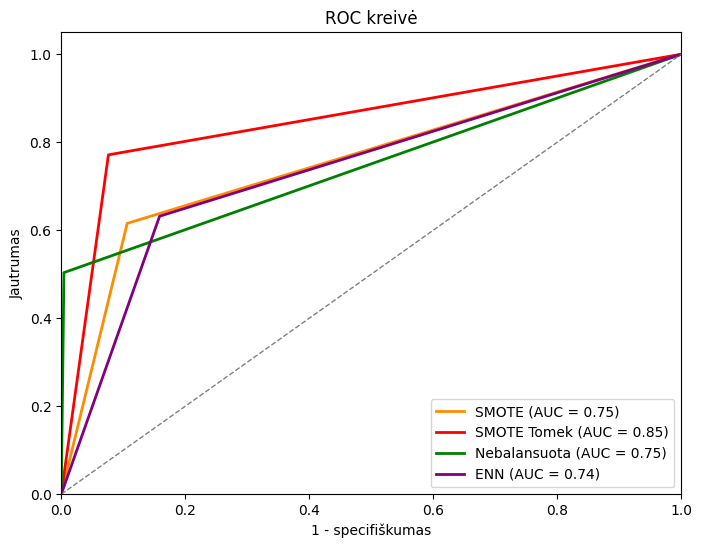

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sm, tpr_sm, color='darkorange', lw=2, label='SMOTE (AUC = %0.2f)' % auc_score_sm)
plt.plot(fpr_smt, tpr_smt, color='red', lw=2, label='SMOTE Tomek (AUC = %0.2f)' % auc_score_smt)
plt.plot(fpr, tpr, color='green', lw=2, label='Nebalansuota (AUC = %0.2f)' % auc_score)
plt.plot(fpr_enn, tpr_enn, color='purple', lw=2, label='ENN (AUC = %0.2f)' % auc_score_enn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specifiškumas')
plt.ylabel('Jautrumas')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

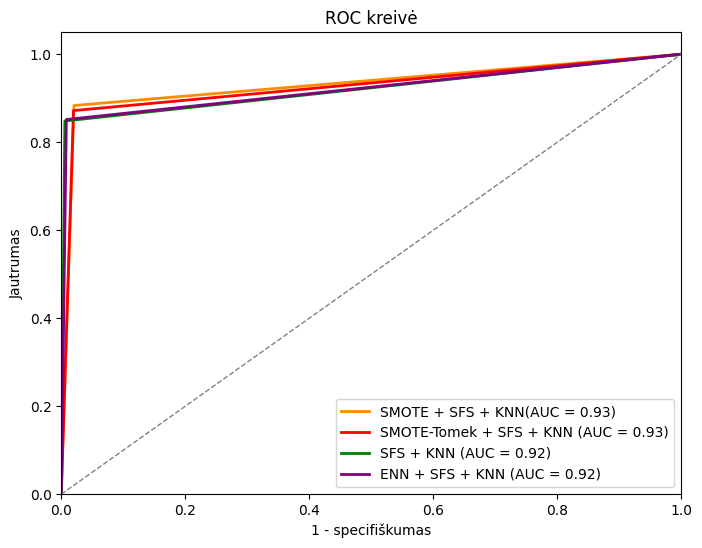

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sm_filtered, tpr_sm_filtered, color='darkorange', lw=2, label='SMOTE + SFS + KNN(AUC = %0.2f)' % auc_score_sm_filtered)
plt.plot(fpr_smt_filtered, tpr_smt_filtered, color='red', lw=2, label='SMOTE-Tomek + SFS + KNN (AUC = %0.2f)' % auc_score_smt_filtered)
plt.plot(fpr_filtered, tpr_filtered, color='green', lw=2, label='SFS + KNN (AUC = %0.2f)' % auc_score_filtered)
plt.plot(fpr_enn_filtered, tpr_enn_filtered, color='purple', lw=2, label='ENN + SFS + KNN (AUC = %0.2f)' % auc_score_enn_filtered)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specifiškumas')
plt.ylabel('Jautrumas')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

In [24]:
cm = confusion_matrix(y_test, y_pred_org)
cm_enn = confusion_matrix(y_test, y_pred_enn)
cm_sm = confusion_matrix(y_test, y_pred_sm)
cm_smt = confusion_matrix(y_test, y_pred_smt)

cm_filtered = confusion_matrix(y_test_filtered, y_pred_org_filtered)
cm_enn_filtered = confusion_matrix(y_test_filtered, y_pred_enn_filtered)
cm_sm_filtered = confusion_matrix(y_test_filtered, y_pred_sm_filtered)
cm_smt_filtered = confusion_matrix(y_test_filtered, y_pred_smt_filtered)

In [ ]:
# Wrapper emthods

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)

In [57]:
from sklearn.feature_selection import SequentialFeatureSelector

In [66]:
knn = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', direction='forward', scoring='f1', cv=5)

sfs.fit(X_train_ht, y_train_ht)

selected_features = X_train_ht.columns[sfs.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['GWP', 'PRODUCT_MOD', 'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short',
       'Make_ALFA ROMEO', 'Make_APRILIA', 'Make_CHEVROLET',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_JAGUAR',
       'Make_JEEP', 'Make_KAWASAKI', 'Make_KIA', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_MINI', 'Make_NISSAN', 'Make_Other',
       'Make_ROVER', 'Make_SAAB', 'Make_SUZUKI', 'Make_YAMAHA',
       'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Jonava', 'City_Kauno rajonas', 'City_Marijampolės rajonas',
       'City_Panevėžio rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinit

In [67]:
knn = KNeighborsClassifier()

sfs_enn = SequentialFeatureSelector(knn, n_features_to_select='auto', direction='forward', scoring='f1', cv=5)

sfs_enn.fit(X_train_enn_ht, y_train_enn_ht)

selected_features_enn = X_train_enn_ht.columns[sfs_enn.get_support()]
print("Selected features:", selected_features_enn)

Selected features: Index(['GWP', 'PRODUCT_MOD', 'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short',
       'Make_ALFA ROMEO', 'Make_APRILIA', 'Make_CHEVROLET',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_JAGUAR',
       'Make_JEEP', 'Make_KAWASAKI', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_LEXUS', 'Make_MAZDA', 'Make_MINI',
       'Make_MITSUBISHI', 'Make_Other', 'Make_ROVER', 'Make_SAAB',
       'Make_YAMAHA', 'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Kauno rajonas',
       'City_Marijampolė', 'City_Marijampolės rajonas', 'City_Mažeikiai',
       'City_Panevėžio rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Aff

In [74]:
knn = KNeighborsClassifier()

sfs_sm = SequentialFeatureSelector(knn, n_features_to_select='auto', direction='forward', scoring='f1', cv=5)

sfs_sm.fit(X_train_sm_ht, y_train_sm_ht)

selected_features_sm = X_train_sm_ht.columns[sfs_sm.get_support()]
print("Selected features:", selected_features_sm)

Selected features: Index(['GWP', 'number_of_claims', 'Policy_Duration', 'PRODUCT_MOD',
       'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short', 'Make_ALFA ROMEO',
       'Make_APRILIA', 'Make_CHEVROLET', 'Make_CHRYSLER',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_HYUNDAI',
       'Make_JAGUAR', 'Make_JEEP', 'Make_KAWASAKI', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_MINI', 'Make_NISSAN', 'Make_ROVER',
       'Make_SAAB', 'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Alytus', 'City_Jonava', 'City_Marijampolė',
       'City_Marijampolės rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affi

In [75]:
knn = KNeighborsClassifier()

sfs_smt = SequentialFeatureSelector(knn, n_features_to_select='auto', direction='forward', scoring='f1', cv=5)

sfs_smt.fit(X_train_smt_ht, y_train_smt_ht)

selected_features_smt = X_train_smt_ht.columns[sfs_smt.get_support()]
print("Selected features:", selected_features_smt)

Selected features: Index(['Vehicle_age', 'Make_ALFA ROMEO', 'Make_APRILIA', 'Make_CHEVROLET',
       'Make_CHRYSLER', 'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT',
       'Make_JAGUAR', 'Make_JEEP', 'Make_KAWASAKI', 'Make_KIA', 'Make_KTM',
       'Make_LANCIA', 'Make_LAND ROVER', 'Make_LEXUS', 'Make_MINI',
       'Make_MITSUBISHI', 'Make_RENAULT', 'Make_ROVER', 'Make_SAAB',
       'Make_SEAT', 'Make_SUBARU', 'Make_SUZUKI', 'Make_YAMAHA',
       'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Jonava', 'City_Klaipėdos rajonas', 'City_Marijampolės rajonas',
       'City_Mažeikiai', 'City_Panevėžio rajonas', 'City_Unknown',
       'City_Šiaulių rajonas', 'Ch

In [30]:
selected_features = X_train.columns[sfs.get_support()]
print("Selected features:", selected_features)

# Train KNN using only the selected features for further evaluation
knn.fit(X_train[selected_features], y_train)

# Selected features: Index(['GWP', 'PRODUCT_MOD', 'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short',
#        'Make_ALFA ROMEO', 'Make_APRILIA', 'Make_CHEVROLET', 'Make_CITROEN',
#        'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_JAGUAR',
#        'Make_JEEP', 'Make_KAWASAKI', 'Make_KIA', 'Make_KTM', 'Make_LANCIA',
#        'Make_LAND ROVER', 'Make_LEXUS', 'Make_MINI', 'Make_Other',
#        'Make_ROVER', 'Make_SAAB', 'Make_SEAT', 'Make_SKODA', 'Make_YAMAHA',
#        'vehicle_type_group_mapped_2) Truck over 3,5T',
#        'vehicle_type_group_mapped_3) Delivery van',
#        'vehicle_type_group_mapped_4) Full trailer',
#        'vehicle_type_group_mapped_5) Motorcycle',
#        'vehicle_type_group_mapped_6) Personal',
#        'vehicle_type_group_mapped_7) Trailer',
#        'vehicle_type_group_mapped_8) Tractor', 'City_Jonava',
#        'City_Marijampolės rajonas', 'City_Mažeikiai', 'City_Panevėžio rajonas',
#        'City_Unknown', 'City_Šiaulių rajonas', 'Channel_Affinity',
#        'Channel_Direct Corporate Sales'],

Selected features: Index(['GWP', 'PRODUCT_MOD', 'PRODUCT_MTPL', 'Duration_Long', 'Duration_Short',
       'Make_ALFA ROMEO', 'Make_APRILIA', 'Make_CHEVROLET',
       'Make_DAIMLERCHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_JAGUAR',
       'Make_JEEP', 'Make_KAWASAKI', 'Make_KIA', 'Make_KTM', 'Make_LANCIA',
       'Make_LAND ROVER', 'Make_MINI', 'Make_NISSAN', 'Make_Other',
       'Make_ROVER', 'Make_SAAB', 'Make_SUZUKI', 'Make_YAMAHA',
       'vehicle_type_group_mapped_2) Truck over 3,5T',
       'vehicle_type_group_mapped_3) Delivery van',
       'vehicle_type_group_mapped_4) Full trailer',
       'vehicle_type_group_mapped_5) Motorcycle',
       'vehicle_type_group_mapped_6) Personal',
       'vehicle_type_group_mapped_7) Trailer',
       'vehicle_type_group_mapped_8) Tractor', 'City_Alytaus rajonas',
       'City_Jonava', 'City_Kauno rajonas', 'City_Marijampolės rajonas',
       'City_Panevėžio rajonas', 'City_Telšiai', 'City_Unknown',
       'City_Šiaulių rajonas', 'Channel_Affinit

KNeighborsClassifier()